# Machine learning
## Algoritmos básicos:  Árbol de desición y bosque aleatorio.
Hecho por Deivi :D jeje



In [1]:
print("Con todooooo")
print("Arriba Kanji jiiiiiiiiiiiiiiiiii")

Con todooooo
Arriba Kanji jiiiiiiiiiiiiiiiiii


## Árbol de desición
---






Un árbol de decisión es un algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.


Hablanado generalmente, es un árbol binario que recursivamente divide el dataset hasta que tengamos a la izquierda nodos de hojas puros. El cual es el dato con un sólo tipo de clase.

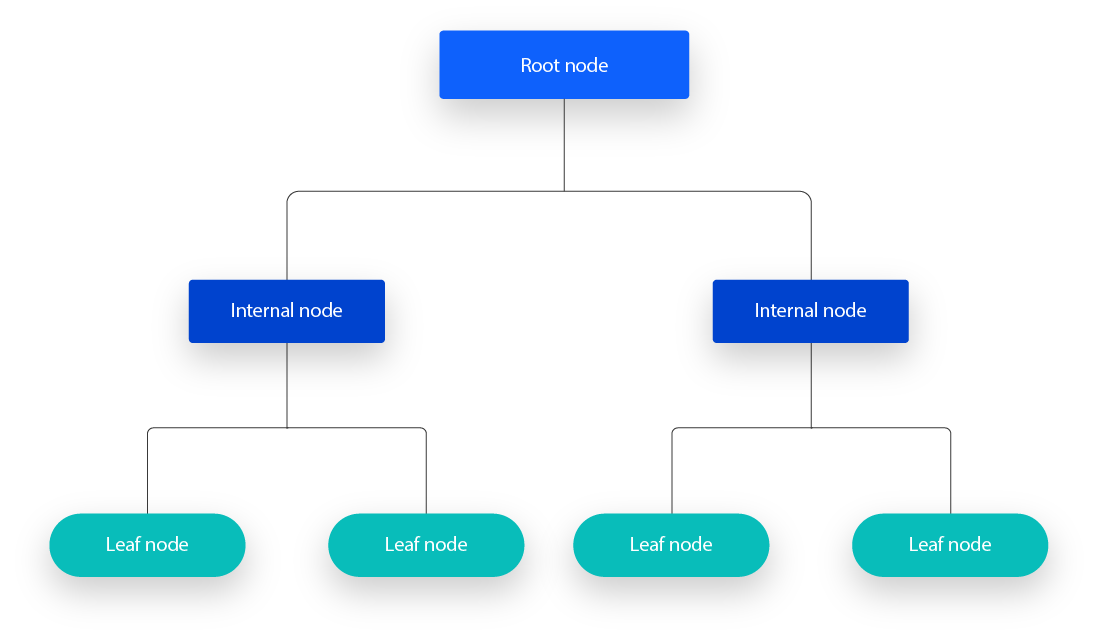

Entonces, divide el espacio de los predictores agrupando observaciones con valores similares para la variable respuesta o dependiente.

Para dividir el espacio muestral en sub-regiones es preciso aplicar una serie de reglas o decisiones, para que cada sub-región contenga la mayor proporción posible de individuos de una de las poblaciones.

Si una sub-región contiene datos de diferentes clases, se subdivide en regiones más pequeñas hasta fragmentar el espacio en sub-regiones menores que integran datos de la misma clase

Recuerden, el tipo de problema a resolver dependerá de la variable a predecir:

- **Variable dependiente**: estaríamos ante un problema de regresión.
- **Variable categórica**: nos enfrentaríamos a un problema de clasificación.

#### ¿Como funciona? (izi pizi edition)

Lo que el algoritmo hace es organizar las decisiones en una estructura de árbol, en la que cada nodo representa una pregunta o condición, y cada rama representa una posible respuesta.


- **Nodos de decisión**: Cada nodo realiza una pregunta basada en una característica del conjunto de datos.
- **Ramas**: Cada rama representa una posible respuesta a la pregunta del nodo.
- **Nodos finales (hojas)**: Las hojas contienen las predicciones finales del modelo. En clasificación, la hoja final asigna una clase, y en regresión, da un valor numérico.

### ¿Cómo decide el árbol?

El algoritmo va dividiendo los datos en subconjuntos, eligiendo en cada paso la característica que mejor separa las muestras (según una métrica como Gini, entropía o reducción de varianza). Así, crea divisiones hasta que las hojas son homogéneas en su clase (o casi), o hasta llegar a una profundidad máxima.

### Algoritmos de construcción

#### ID3 (Iterative Dichotomiser 3)

ID3 construye árboles de decisión de arriba hacia abajo, comenzando por el nodo raíz y trabajando hacia los nodos hoja. En cada paso, selecciona el atributo que maximiza la ganancia de información, dividiendo los datos en subconjuntos basados en las características que mejor explican la variabilidad de la clase objetivo.

**Entropía**: Es una medida de incertidumbre o impureza en los datos. ID3 usa la entropía para calcular la incertidumbre en la clasificación de datos según los valores de los atributos. Cuanto mayor sea la entropía, más desordenados están los datos.


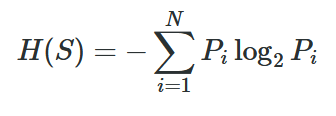

**Ganancia de Información**: Representa la reducción de la entropía al dividir un conjunto de datos con un atributo específico. ID3 selecciona el atributo con la mayor ganancia de información, ya que este proporciona la mejor separación entre las clases.

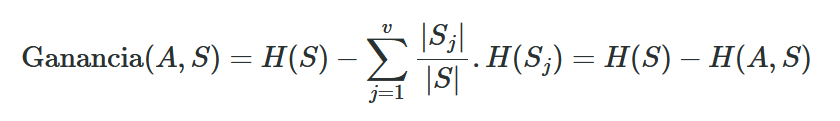

##### **Como chotas funciona**

**Calcular la Entropía del Nodo Raíz**: Para el conjunto de datos completo, se calcula la entropía general del nodo raíz.


**Evaluar Atributos**: Para cada atributo, ID3 calcula la ganancia de información que se obtendría si el conjunto de datos se dividiera usando dicho atributo.


**Seleccionar el Mejor Atributo**: El atributo con la mayor ganancia de información se elige como el nodo de decisión para el árbol.


**Dividir el Conjunto de Datos**: El conjunto de datos se divide en subconjuntos basados en el valor del atributo seleccionado.


**Repetir el Proceso**: El algoritmo se aplica recursivamente a cada subconjunto hasta que se cumpla alguna condición de detención, como:

- Todos los ejemplos en un subconjunto pertenecen a la misma clase.
- No hay más atributos disponibles para dividir.
- Se alcanza una profundidad máxima especificada en el árbol.

##### **Término del algoritmo**


ID3 termina cuando todos los elementos en un nodo pertenecen a la misma clase (impureza cero).

No hay más atributos disponibles para dividir (se crea un nodo hoja).
Se alcanza una profundidad de árbol predeterminada.

##### **Limitaciones**

**Propenso al Sobreajuste**: ID3 tiende a crear árboles complejos si no se le aplican técnicas de poda, lo que lo hace sensible al sobreajuste.

**Limitado a Atributos Categóricos**: ID3 solo maneja atributos categóricos; para datos numéricos, es necesario discretizarlos antes de aplicar el algoritmo.

**No Maneja Valores Nulos**: El algoritmo no tiene un mecanismo para manejar datos faltantes o valores nulos, por lo que estos deben limpiarse previamente.

##### Ejemplo desde cero :o

In [ ]:
import pandas as pd
import numpy as np

# Crear el conjunto de datos
data = {
    'Cielo': ['soleado', 'soleado', 'nublado', 'lluvioso', 'lluvioso', 'lluvioso', 'nublado', 'soleado', 'soleado', 'lluvioso', 'soleado', 'nublado', 'nublado', 'lluvioso'],
    'Temperatura': ['alta', 'alta', 'alta', 'baja', 'baja', 'baja', 'alta', 'alta', 'baja', 'baja', 'baja', 'alta', 'baja', 'alta'],
    'Humedad': ['alta', 'alta', 'alta', 'alta', 'baja', 'baja', 'alta', 'alta', 'baja', 'baja', 'alta', 'alta', 'alta', 'baja'],
    'Viento': ['débil', 'fuerte', 'débil', 'débil', 'débil', 'fuerte', 'débil', 'débil', 'débil', 'débil', 'fuerte', 'fuerte', 'débil', 'fuerte'],
    'Jugar': ['no', 'no', 'sí', 'sí', 'sí', 'no', 'sí', 'no', 'sí', 'sí', 'sí', 'sí', 'sí', 'no']
}

df = pd.DataFrame(data)

In [ ]:
from collections import Counter

def calcular_entropia(datos):
    etiquetas = datos['Jugar']
    cuenta = Counter(etiquetas)
    total = len(etiquetas)
    entropia = -sum((count / total) * np.log2(count / total) for count in cuenta.values()) # Formulazo
    return entropia # Que tan impredecible o variada es la informacion de esa columna
    # La entropía mide el grado de desorden o incertidumbre en los datos. Cuanto mayor sea la entropía,
    # más "mezclados" están los datos (es decir, es menos predecible).

def calcular_ganancia_informacion(df, atributo):
    entropia_inicial = calcular_entropia(df)
    valores = df[atributo].unique() # Valores únicos
    total = len(df)

    entropia_condicional = 0 # esta se irá acumulando
    for valor in valores:
        subconjunto = df[df[atributo] == valor] # filtramos ese subconjunto, donde sea el mismo valor
        peso = len(subconjunto) / total # Proporcion del subconjunto en relacion al total de los datos
        entropia_condicional += peso * calcular_entropia(subconjunto) # agregamos la entropia de ese subconjunto por peso

    ganancia = entropia_inicial - entropia_condicional #cuánto se reduce la incertidumbre al dividir los datos según el atributo dado
    return ganancia # qué tan útil es el atributo para clasificar los datos


In [ ]:
def construir_arbol(df, atributos):
    # Si todas las etiquetas son iguales, devolvemos la clase
    if len(df['Jugar'].unique()) == 1:
        return df['Jugar'].iloc[0] # devuelve el primer valor

    # Si no quedan atributos, devolvemos la clase mayoritaria
    if not atributos:
        return df['Jugar'].mode()[0]

    # Seleccionar el mejor atributo basándose en la ganancia de información
    ganancia_mejor = -1
    mejor_atributo = None
    for atributo in atributos:
        ganancia = calcular_ganancia_informacion(df, atributo)
        if ganancia > ganancia_mejor:
            ganancia_mejor = ganancia
            mejor_atributo = atributo

    # Crear el nodo raíz usando el mejor atributo
    arbol = {mejor_atributo: {}}
    valores_unicos = df[mejor_atributo].unique()

    # Dividir el conjunto de datos por cada valor del mejor atributo y llamar recursivamente
    for valor in valores_unicos:
        subconjunto = df[df[mejor_atributo] == valor]
        subatributos = [a for a in atributos if a != mejor_atributo]
        arbol[mejor_atributo][valor] = construir_arbol(subconjunto, subatributos)

    return arbol


In [ ]:
atributos = ['Cielo', 'Temperatura', 'Humedad', 'Viento']
arbol_decision = construir_arbol(df, atributos)
print(arbol_decision)


{'Cielo': {'soleado': {'Temperatura': {'alta': 'no', 'baja': 'sí'}}, 'nublado': 'sí', 'lluvioso': {'Viento': {'débil': 'sí', 'fuerte': 'no'}}}}


In [ ]:
def predecir(arbol, muestra):
    # Si el árbol es una decisión (sí/no), se devuelve la decisión
    if isinstance(arbol, str):
        return arbol

    # De lo contrario, se navega el árbol recursivamente según el valor de cada atributo
    atributo = next(iter(arbol))  # Toma el primer (y único) atributo en este nivel del árbol
    valor = muestra.get(atributo)

    if valor in arbol[atributo]:
        subarbol = arbol[atributo][valor]
        return predecir(subarbol, muestra)
    else:
        return "Atributo o valor desconocido"

# Ejemplo de muestra para predecir
muestra_nueva = {'Cielo': 'soleado', 'Temperatura': 'alta', 'Humedad': 'alta', 'Viento': 'débil'}
decision = predecir(arbol_decision, muestra_nueva)
print(f"Decisión para jugar: {decision}")


Decisión para jugar: no


#### CART (Classification and Regression Trees)



Busca dividir un conjunto de datos en subconjuntos más simples basándose en ciertas características y criterios de decisión.

Muy similar, ¿no?, entonces que diferencias tiene con el ID3?

##### Diferencias con el ID3

* **CART** puede manejar tanto problemas de *clasificación* como de *regresión*, mientras que **ID3** está diseñado específicamente para problemas de clasificación (variables categóricas).
* En problemas de clasificación, **CART** utiliza el **índice de Gini** y en problemas de regresión, el **Error Cuadrático Medio (MSE)** para determinar la mejor división en cada nodo.
* **ID3** emplea la **entropía** y la **ganancia de información** como criterio de división, evaluando qué característica reduce más la incertidumbre sobre la clase de las observaciones.
* **Divisiones en nodos**: CART siempre genera divisiones binarias, donde cada nodo tiene dos ramas (SI o NO), mientras que ID3 puede crear múltiples ramas en un solo nodo de acuerdo al número de valores únicos, lo que puede llevar a árboles más complejos e ineficientes.
* **Poda del árbol**: CART incluye un proceso de **poda** que reduce el tamaño del árbol eliminando ramas irrelevantes que no contribuyen significativamente a la precisión. Por otro lado, ID3 no realiza poda de manera predeterminada, por lo que los árboles generados con ID3 tienden a sobreajustarse más que los árboles de CART.


##### **Índice de GINI**

El índice de Gini mide la impurificación de un conjunto de datos.

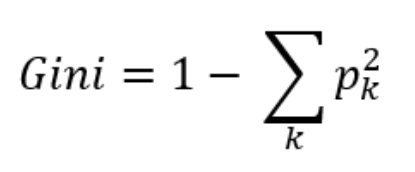

Donde k es el número de clases

Pk es la proporción de elementos de la clase k en el conjunto de datos.

Entonces, es un número que varía entre 0 y 1:
* **Gini = 0**: El conjunto de datos es completamente puro (toda la muestra pertenece a una sola clase).
* **Gini > 0**: Indica cierta impurificación en el conjunto.
* **Gini = 0.5**: Indica una distribución uniforme entre dos clases en el caso más simple (binario).

### Ejemplos


#### Ejemplo 1

Imaginemos que un hospital quiere predecir si un paciente tiene una enfermedad específica basándose en sus síntomas.

Y tenemos como variables síntomas como fiebre, dolor de cabeza, tos, y otros factores como edad o antecedentes.

Entonces el arbol puede hacer preguntas de este tipo:

> - ¿El paciente tiene fiebre alta?
> - ¿Ha tenido contacto reciente con otros pacientes?
> - ¿Tose con frecuencia?


Precisión del modelo diagnóstico médico: 100.00%


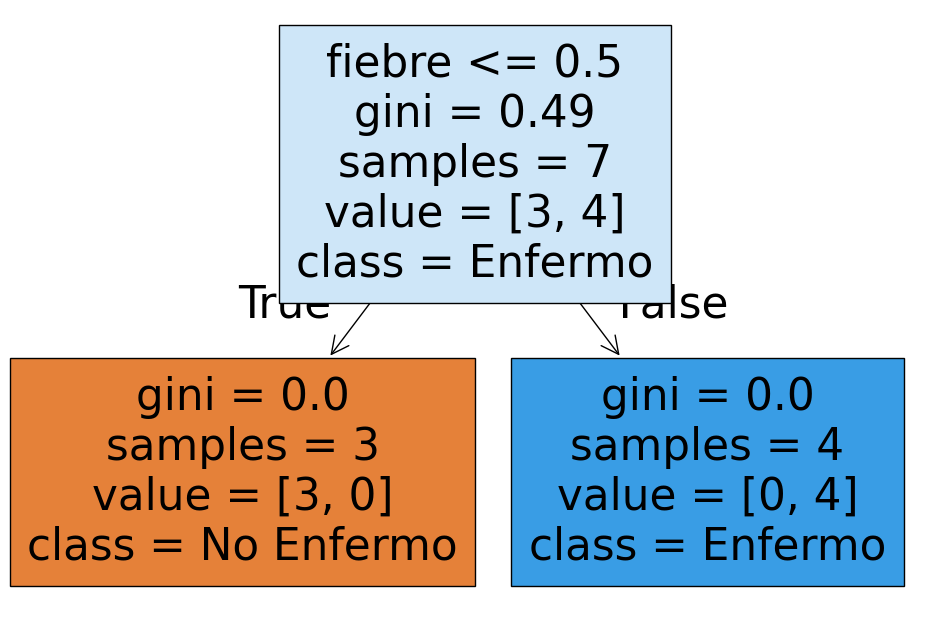

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Datos de pacientes simulados
data_medico = {
    "fiebre": [1, 0, 1, 1, 0, 1, 1, 0, 1, 0],  # 1 = Sí, 0 = No
    "tos": [1, 1, 0, 1, 0, 1, 1, 1, 0, 0],     # 1 = Sí, 0 = No
    "dolor_cabeza": [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],  # 1 = Sí, 0 = No
    "edad": [45, 30, 35, 50, 29, 60, 70, 25, 50, 40]
}

# Etiquetas: 1 = Enfermo, 0 = No enfermo
labels_medico = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]

# Convertimos a DataFrame
df_medico = pd.DataFrame(data_medico)
X_train, X_test, y_train, y_test = train_test_split(df_medico, labels_medico, test_size=0.3, random_state=42)

# Entrenamos el modelo
modelo_medico = DecisionTreeClassifier(random_state=42)
modelo_medico.fit(X_train, y_train)

# Evaluamos y visualizamos
y_pred_medico = modelo_medico.predict(X_test)
print(f"Precisión del modelo diagnóstico médico: {accuracy_score(y_test, y_pred_medico) * 100:.2f}%")

plt.figure(figsize=(12, 8))
plot_tree(modelo_medico, feature_names=df_medico.columns, class_names=["No Enfermo", "Enfermo"], filled=True)
plt.show()

#### Ejemplo 2

Imaginemos que un banco quiere decidir si aprueba o rechaza una solicitud de préstamo.

Y tenemos variables como el ingreso anual, historial de crédito, antigüedad laboral, y monto solicitado.

Entonces el arbol puede hacer preguntas de este tipo:

> - ¿El ingreso anual del solicitante es mayor a $50,000?

De acuerdo a la respuesta, sigue a las siguientes preguntas:

> - ¿Tiene buen historial de crédito?
> - ¿Cuántos años lleva en su trabajo actual?


Precisión del modelo: 100.00%


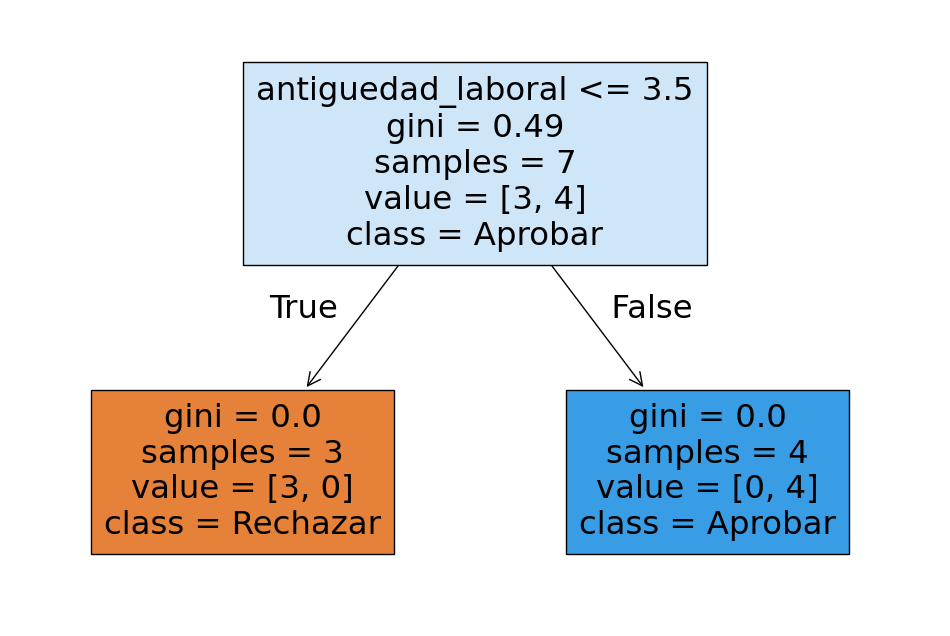

In [ ]:
# Importamos las librerías necesarias
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un conjunto de datos simulado
# Datos de entrada
data = {
    "ingreso_anual": [30000, 50000, 70000, 20000, 45000, 80000, 54000, 15000, 68000, 49000],
    "historial_credito": [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],  # 1 para buen historial, 0 para mal historial
    "antiguedad_laboral": [5, 7, 8, 2, 4, 10, 6, 1, 9, 3],  # Años de trabajo
    "monto_solicitado": [20000, 30000, 50000, 15000, 25000, 40000, 35000, 10000, 45000, 20000]
}

# Etiquetas de salida (1 = aprobar, 0 = rechazar)
labels = [1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

# Convertimos los datos a un DataFrame de pandas
df = pd.DataFrame(data)
X = df
y = labels

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos y entrenamos el modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Realizamos predicciones con el modelo
y_pred = modelo.predict(X_test)

# Evaluamos la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision * 100:.2f}%")

# Visualizamos el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(modelo, feature_names=X.columns, class_names=["Rechazar", "Aprobar"], filled=True)
plt.show()


#### Ejemplo 3

Imaginemos que un sitio de ventas quiere recomendar productos a los usuarios según sus intereses y comportamientos.

Y tenemos como variables el historial de compras, categoría favorita de productos, rango de precios en compras anteriores.

Entonces el arbol puede segmentar preguntas como:

> - ¿Ha comprado productos de tecnología en los últimos 6 meses?
> - ¿Su rango de compra promedio es alto?
> - ¿Compra frecuentemente productos de una categoría específica?


Precisión del modelo de recomendación: 100.00%


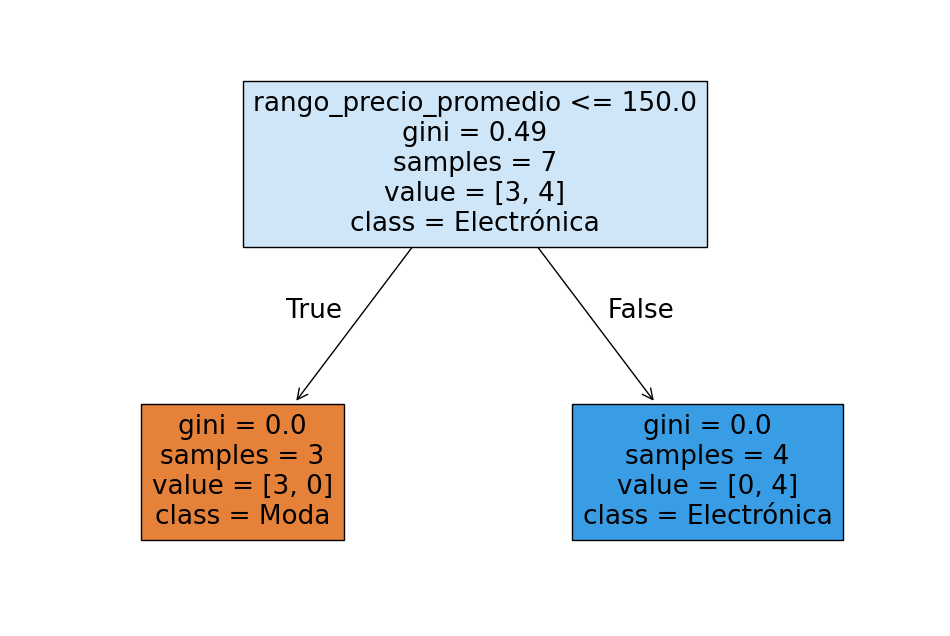

In [ ]:
# Datos simulados de clientes
data_recomendacion = {
    "historial_tecnologia": [1, 0, 1, 0, 1, 1, 0, 0, 1, 1],  # 1 = Sí, 0 = No
    "rango_precio_promedio": [200, 50, 500, 100, 300, 450, 75, 90, 350, 250],
    "frecuencia_compras": [5, 2, 8, 3, 6, 10, 1, 2, 9, 7]  # Número de compras previas
}

# Etiquetas de producto recomendado: 0 = Moda, 1 = Electrónica
labels_recomendacion = [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]

# Convertimos a DataFrame
df_recomendacion = pd.DataFrame(data_recomendacion)
X_train, X_test, y_train, y_test = train_test_split(df_recomendacion, labels_recomendacion, test_size=0.3, random_state=42)

# Entrenamos el modelo
modelo_recomendacion = DecisionTreeClassifier(random_state=42)
modelo_recomendacion.fit(X_train, y_train)

# Evaluamos y visualizamos
y_pred_recomendacion = modelo_recomendacion.predict(X_test)
print(f"Precisión del modelo de recomendación: {accuracy_score(y_test, y_pred_recomendacion) * 100:.2f}%")

plt.figure(figsize=(12, 8))
plot_tree(modelo_recomendacion, feature_names=df_recomendacion.columns, class_names=["Moda", "Electrónica"], filled=True)
plt.show()


#### Ejemplo 4

Imaginemos que una escuela quiere predecir si los estudiantes corren riesgo de abandonar los estudios.

Y tenemos como variables las calificaciones, asistencia, participación en actividades, apoyo familiar.

Entonces el arbol puede segmentar preguntas como:

> - ¿El estudiante tiene buenas calificaciones?
> - ¿Asiste a la mayoría de las clases?
> - ¿Participa en actividades extracurriculares?


Precisión del modelo de abandono escolar: 100.00%


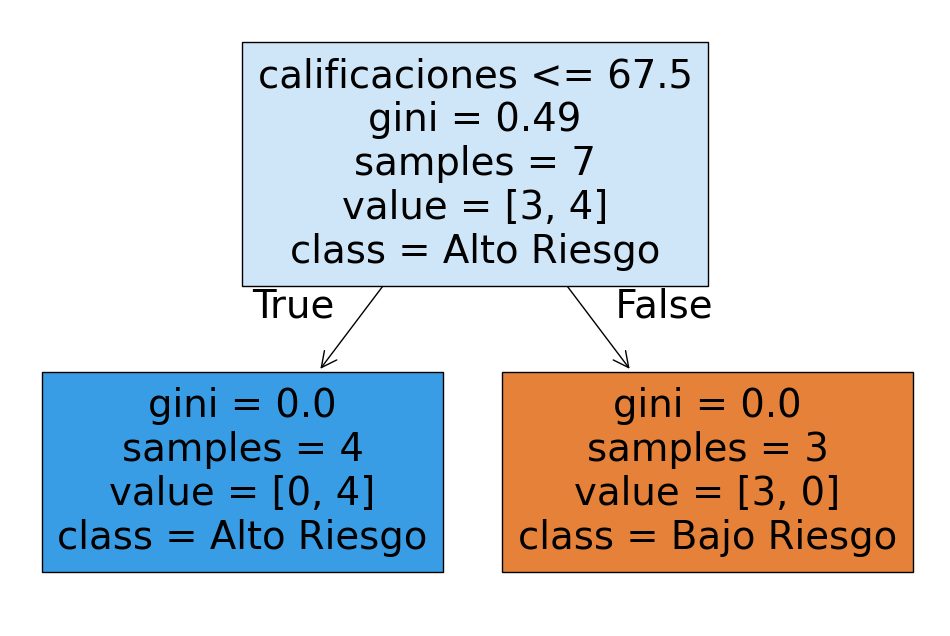

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Datos simulados de estudiantes
data_abandono = {
    "calificaciones": [85, 60, 90, 70, 50, 95, 65, 40, 75, 55],  # Promedio de calificaciones
    "asistencia": [90, 70, 95, 80, 60, 98, 65, 50, 85, 60],  # Porcentaje de asistencia
    "participacion": [1, 0, 1, 1, 0, 1, 0, 0, 1, 0],  # 1 = Participa en actividades, 0 = No participa
    "apoyo_familiar": [1, 1, 1, 1, 0, 1, 0, 0, 1, 0]  # 1 = Apoyo familiar alto, 0 = Apoyo bajo
}

# Etiquetas: 1 = Alto riesgo de abandono, 0 = Bajo riesgo
labels_abandono = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]

# Convertimos a DataFrame
df_abandono = pd.DataFrame(data_abandono)
X_train, X_test, y_train, y_test = train_test_split(df_abandono, labels_abandono, test_size=0.3, random_state=42)

# Entrenamos el modelo
modelo_abandono = DecisionTreeClassifier(random_state=42)
modelo_abandono.fit(X_train, y_train)

# Evaluamos y visualizamos
y_pred_abandono = modelo_abandono.predict(X_test)
print(f"Precisión del modelo de abandono escolar: {accuracy_score(y_test, y_pred_abandono) * 100:.2f}%")

plt.figure(figsize=(12, 8))
plot_tree(modelo_abandono, feature_names=df_abandono.columns, class_names=["Bajo Riesgo", "Alto Riesgo"], filled=True)
plt.show()


## Bosque aleatorio (Random Forest)
---

Es una técnica de ensamble que combina múltiples árboles de decisión (Decision Trees) para mejorar la precisión y reducir el sobreajuste (Overfitting).

### **¿Cómo funciona?**

Un bosque aleatorio crea una "**votación**" de varios árboles de decisión. Cada árbol se entrena con un subconjunto de los datos y una selección aleatoria de características, lo cual introduce diversidad y reduce el sesgo.

#### **Pasos a seguir**

1. **Muestreo aleatorio con reemplazo (Bagging)**: Se generan subconjuntos aleatorios de datos para entrenar cada árbol. Esta técnica ayuda a reducir la varianza.


2. **Selección aleatoria de características**: En cada división de un árbol, se selecciona un subconjunto aleatorio de características para buscar el mejor punto de corte. Esto evita que ciertos árboles dominen el resultado y mejora la robustez.


3. **Agregación de resultados**:

  - Para clasificación: Cada árbol hace una predicción, y el bosque aleatorio selecciona la clase con más votos (clasificación por mayoría).
  - Para regresión: Se promedian las predicciones de todos los árboles.

### **Lo chido**

**Reducción de sobreajuste**: Al promediar los resultados de múltiples árboles, se minimiza el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento.

**Escalabilidad**: Puede manejar grandes volúmenes de datos y muchas características de entrada sin una reducción significativa en el rendimiento.

### **Lo malo**

**Velocidad de predicción**: La agregación de múltiples árboles puede hacer que la predicción sea más lenta en comparación con otros modelos.

**Requiere más memoria**: La necesidad de almacenar múltiples árboles aumenta el uso de memoria.

### **Parámetros importantes**

**Número de árboles** (`n_estimators`): Cuantos más árboles haya, mejor suele ser el rendimiento, pero esto incrementa el tiempo de cálculo.


**Profundidad máxima** (`max_depth`): Limita la profundidad de cada árbol para controlar el sobreajuste.


**Número mínimo de muestras para dividir un nodo** (`min_samples_split`): Ajusta la cantidad de datos mínima requerida para hacer una división.


**Número de características seleccionadas en cada división** (`max_features`): Controla cuántas características se consideran al dividir cada nodo, lo cual puede mejorar la precisión y la eficiencia.

### Ejemplos
---

#### Ejemplo 1: De nuevo, clasificando flores IRIS XD

In [1]:
# Importar librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Cargamos de nuevo los datos de iris xd
data = load_iris()
X, y = data.data, data.target

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=666)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = model.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Exactitud: 0.9777777777777777
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Ejemplo 2: Clasificacion de dígitos

Dimensiones de las características: (1797, 64)
Dimensiones de las etiquetas: (1797,)


<Figure size 640x480 with 0 Axes>

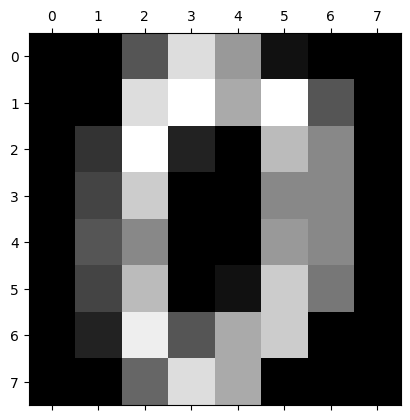

Etiqueta: 0


In [4]:
import matplotlib.pyplot as plt

digits = load_digits()

# Ver las dimensiones de las características y etiquetas
print("Dimensiones de las características:", digits.data.shape)  # (1797, 64)
print("Dimensiones de las etiquetas:", digits.target.shape)      # (1797,)

# Mostrar la primera imagen del dataset
plt.gray()
plt.matshow(digits.images[0])
plt.show()

print("Etiqueta:", digits.target[0])

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos de dígitos
data = load_digits()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=666)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = model.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Exactitud: 0.975925925925926
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.96      0.98      0.97        49
           2       1.00      1.00      1.00        53
           3       1.00      0.95      0.97        61
           4       0.98      0.98      0.98        56
           5       0.93      0.98      0.95        52
           6       1.00      0.98      0.99        47
           7       0.95      1.00      0.97        52
           8       0.95      0.95      0.95        57
           9       1.00      0.95      0.97        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



#### Ejemplo 3: Prediciendo el precio de una casa

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=666)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Error cuadrático medio:", mean_squared_error(y_test, y_pred))
print("Error absoluto medio:", mean_absolute_error(y_test, y_pred))


Error cuadrático medio: 0.3015325997826921
Error absoluto medio: 0.375573109959842


### Ejemplote: Vinos

En este ejemplo, veremos info sobre caraterísticas químicas de los vinos para clasificar tres tipos de vinos :o

1. Importamos las Librerias necesarisa, cargamos los datos, convertimos a dataframe, y femos las primeras filas para ver el conjunto de datos.

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = load_wine()
X, y = data.data, data.target

In [10]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
print("Primeras filas del conjunto de datos:\n", df.head())

Primeras filas del conjunto de datos:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilut

2. Dividimos los datos en entrenamiento y prueba

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (124, 13)
Tamaño del conjunto de prueba: (54, 13)


3. Creamos y entrenamos el modelo base sin ajuste de hiperparámetros.

In [15]:
modelito = RandomForestClassifier(random_state=666)
modelito.fit(X_train, y_train)

RandomForestClassifier(random_state=666)

4. Hacemos predicciones y evaluamos su modelo base.

In [17]:
y_pred = modelito.predict(X_test)
print("\nExactitud del modelo base:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación del modelo base:\n", classification_report(y_test, y_pred))



Exactitud del modelo base: 0.9629629629629629
Reporte de clasificación del modelo base:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.97        30
           2       0.91      1.00      0.95        10

    accuracy                           0.96        54
   macro avg       0.95      0.98      0.96        54
weighted avg       0.97      0.96      0.96        54



5. Ajustamos los hiperparametros con **GridSearchCV**

(Luego lo vemos mas a detalle c: )

In [18]:
# Definir el grid de parámetros para probar diferentes combinaciones
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV con 5-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros encontrados:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
119 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util


Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


6. Evaluamos el modelito optimizadop.


Exactitud del modelo optimizado: 0.9629629629629629
Reporte de clasificación del modelo optimizado:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.97        30
           2       0.91      1.00      0.95        10

    accuracy                           0.96        54
   macro avg       0.95      0.98      0.96        54
weighted avg       0.97      0.96      0.96        54



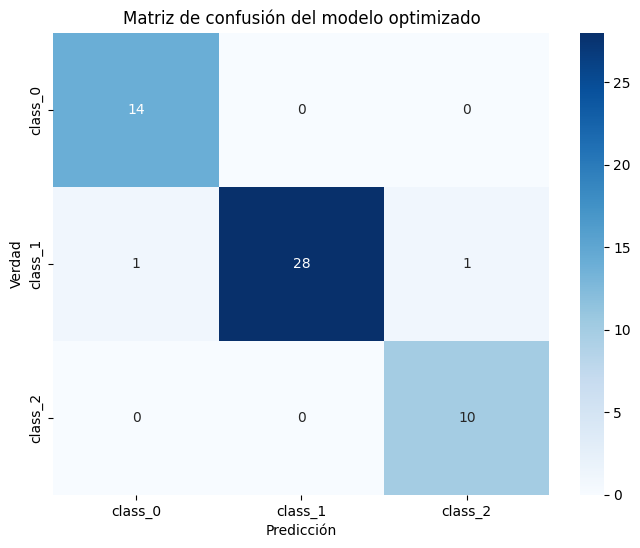

In [19]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluación del modelo optimizado
print("\nExactitud del modelo optimizado:", accuracy_score(y_test, y_pred_best))
print("Reporte de clasificación del modelo optimizado:\n", classification_report(y_test, y_pred_best))

# Matriz de confusión del modelo optimizado
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Matriz de confusión del modelo optimizado")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

7. Wachamos la importancia de las características.

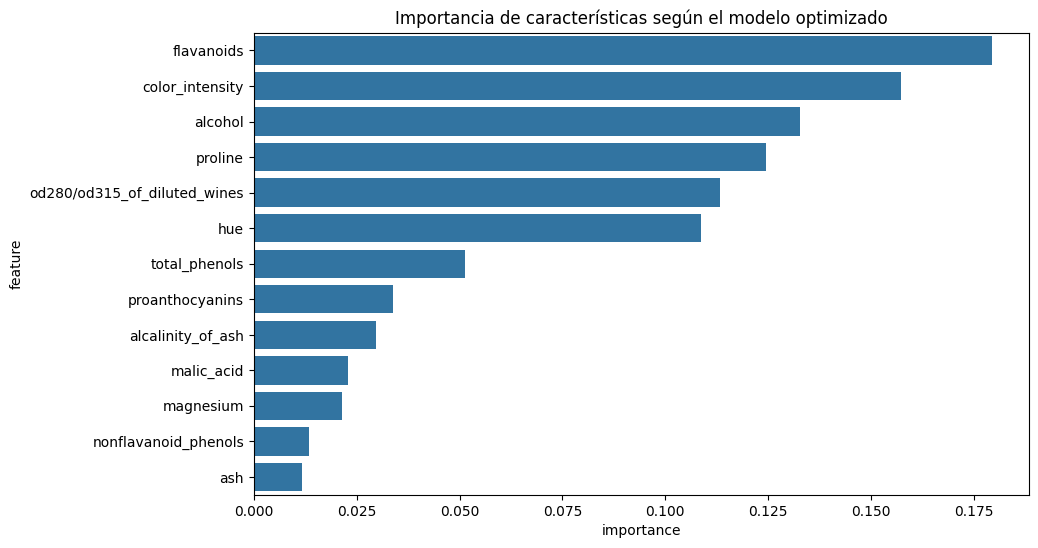

In [20]:
# Obteneniendo las importancias de cada característica
importances = best_model.feature_importances_
feature_names = data.feature_names

# Creando un DataFrame para visualizar la importancia de las características
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Graficando ando
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importances_df)
plt.title("Importancia de características según el modelo optimizado")
plt.show()

---
## Tareita :o
---

* Iniciar el día con toda la actitud 😃
* Comer un pan de muerto relleno uffff (subanlo a sus stories y etiqueten a SIAFI)
* Checar la tarea moral
* Hacer lo siguiente:



Construir un modelo de clasificación utilizando el algoritmo de **Bosque Aleatorio**. El objetivo del modelo será predecir una categoría o clase en función de un conjunto de características.
Pasos:
1. Selección del Conjunto de Datos
2. Preprocesamiento de los Datos
3. División del Conjunto de Datos
4. Construcción y Entrenamiento del Modelo de Bosque Aleatorio
5. Interpretación del Modelo

---
## Tareita moral
---

Investigar lo siguiente:
* ¿Qué es un perceptrón?
* ¿Que es una neurona?
* ¿Que es una red neuronal?
* ¿Que es una Red neuronal artificial?
* ¿Qué es una función de activación?
* ¿Hay diferencia entre Machine learning y Deep learning?



**Analicen e intenten razonar el siguiente código:**

**¿Por qué?**: En el código siguiente se implementa un Arbol de desición desde cero. Si entienden el algoritmo, entienden todo :D
Al menos denle una leida

## Codigo a entender (tarea moral)

### Import tools

In [ ]:
import numpy as np
import pandas as pd

### Get the data

In [ ]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data = pd.read_csv("iris.csv", skiprows=1, header=None, names=col_names)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

### Tree class

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Train-Test split

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

### Fit the model

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_2 <= 1.9 ? 0.33741385372714494
 left:0.0
 right:X_3 <= 1.5 ? 0.427106638180289
  left:X_2 <= 4.9 ? 0.05124653739612173
    left:1.0
    right:2.0
  right:X_2 <= 5.0 ? 0.019631171921475288
    left:X_1 <= 2.8 ? 0.20833333333333334
        left:2.0
        right:1.0
    right:2.0


### Test the model

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9333333333333333